In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
HOME = os.environ['HOME']
sys.path.append(HOME + '/catkin_ws/src/fl4sr/src')

import matplotlib.pyplot as plt
import numpy as np
import pickle

from utils import *

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.style"] = 'normal'
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = 'normal'

LINES = ['-', '--', '-.']
LINES_COUNT = len(LINES)

## Methods: All runs

In [22]:
M = 4
methods = ['IDDPG', 'SEDDPG', 'SNDDPG', 'FLDDPG']

S = 1
N = 10

path_data = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(S, N+1)]

path_name_iddpg = ['IDDPG{}-{}'.format('-b-30000', i) for i in range(S, N+1)]
path_name_seddpg = ['SEDDPG{}-{}'.format('-5-short', i) for i in range(S, N+1)]
path_name_snddpg = ['SNDDPG{}-{}'.format('-b-70000', i) for i in range(S, N+1)]
path_name_flddpg = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(S, N+1)]

exp_iddpg = load_multiple_experiments(path_data, path_name_iddpg)
exp_seddpg = load_multiple_experiments(path_data, path_name_seddpg)
exp_snddpg = load_multiple_experiments(path_data, path_name_snddpg)
exp_flddpg = load_multiple_experiments(path_data, path_name_flddpg)
exp = [exp_iddpg, exp_seddpg, exp_snddpg, exp_flddpg]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

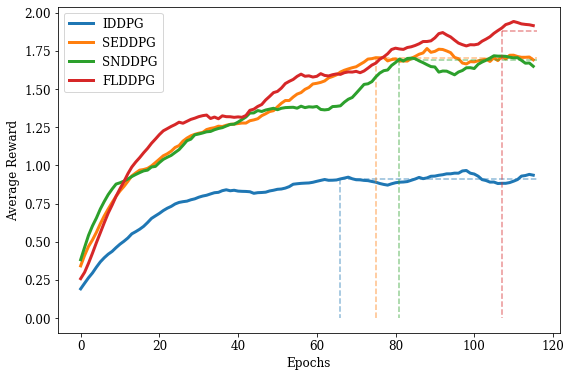

In [23]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
C = 1

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i), linewidth=3)
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.xlabel('Epochs')
plt.ylabel('Average Reward')
plt.legend()
#plt.savefig('methods_reward.png', dpi=200)
plt.show()

0.3365000000000001
0.5814999999999999
0.6087499999999999
0.758625


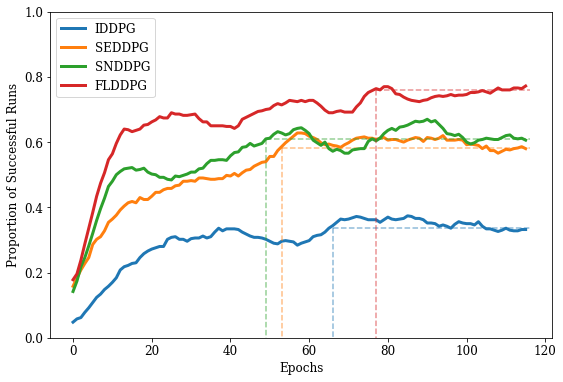

In [24]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]


xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(i), linewidth=3)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
#plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of Successful Runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('methods_success.png', dpi=200)
plt.show()

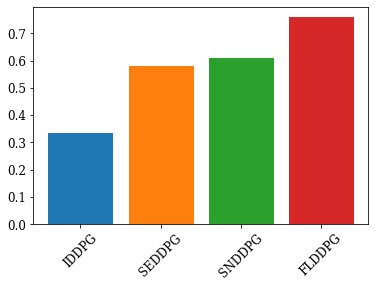

In [25]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))


## Only one run

No handles with labels found to put in legend.


NAME SNDDPG
robot_count 5
observation_dimension 28
action_dimension 2
episode_count 125
episode_step_count 1024
TIME_TRAIN 5
TIME_TARGET 5
TIME_UPDATE 2
EPSILON 0.03589027739491586
EPSILON_DECAY 0.99997
buffer_count 1
BUFFER_SIZE 70000
agent_count 1
ACTOR_HIDDEN_LAYERS [64, 64, 64]
CRITIC_HIDDEN_LAYERS [64, 64, 64]
LEARNING_RATE_ACTOR 0.001
LEARNING_RATE_CRITIC 0.001
BATCH_SIZE 512
GAMMA 0.9
TAU_TARGET 1.0
COLLISION_RANGE 0.25
GOAL_RANGE 0.5
PROGRESS_REWARD_FACTOR 40.0
REWARD_GOAL 100.0
REWARD_COLLISION -10.0


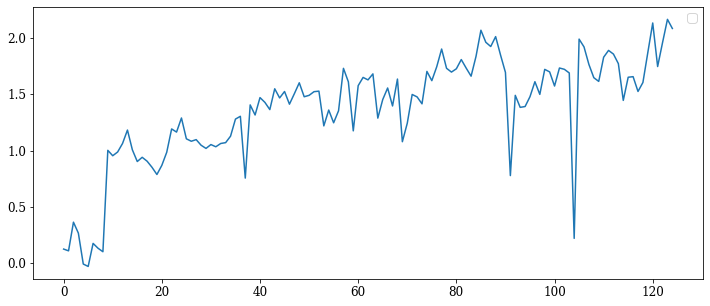

In [15]:
path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'
path_name = 'SNDDPG-b-70000-10'
# 2 11


with open(path_data + '/' + path_name + '/log/' + 'parameters.pkl', 'rb') as f:
    params = pickle.load(f)
for key in params.keys():
    print(key, params[key])

exp = load_experiment(path_data, path_name)

rewards = np.mean(exp.values.rewards, axis=1)
#rewards = exp.values.rewards[:, 1]

plt.figure(figsize=(12, 5))
xs = np.arange(rewards.shape[0])
plt.plot(xs, rewards)
plt.legend()
plt.show()

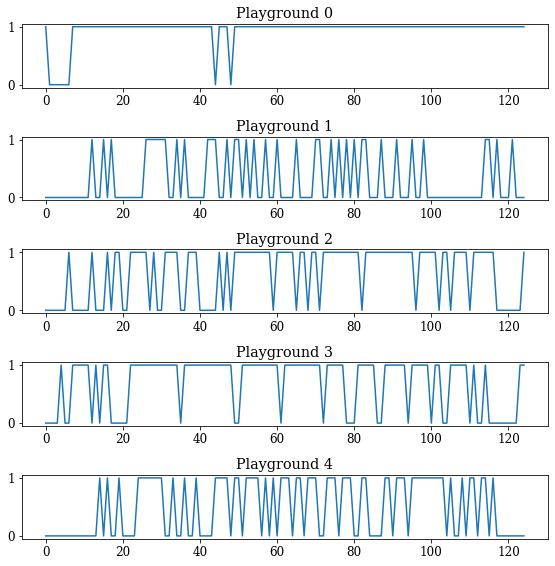

In [22]:
rows = exp.values.succeded.shape[1]
colums = 1

fig, ax = plt.subplots(nrows=rows, ncols=colums, figsize=(8, 8))

xs = np.arange(exp.values.succeded.shape[0])
for i, axi in enumerate(ax.flat):
    rowid = i // colums
    colid = i % colums
    axi.set_title('Playground {}'.format(i))
    axi.plot(xs, exp.values.succeded[:, i])

plt.tight_layout(True)
plt.show()

## Methods: Only one

In [8]:
M = 4
methods = ['IDDPG', 'SEDDPG', 'SNDDPG', 'FLDDPG']

path_data = '/home/pikmanjan/fl4sr-evaluation/fl4sr-data'

prefix = '-b-0000'
index = 4
path_name_iddpg = 'IDDPG{}-{}'.format(prefix, index)
path_name_seddpg = 'SEDDPG{}-{}'.format(prefix, index)
path_name_snddpg = 'SNDDPG{}-{}'.format(prefix, index)
path_name_flddpg = 'FLDDPG{}-{}'.format(prefix, index)

exp_iddpg = load_experiment(path_data, path_name_iddpg)
exp_seddpg = load_experiment(path_data, path_name_seddpg)
exp_snddpg = load_experiment(path_data, path_name_snddpg)
exp_flddpg = load_experiment(path_data, path_name_flddpg)
exp = [exp_iddpg, exp_seddpg, exp_snddpg, exp_flddpg]

val = [e.values for e in exp]
means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]

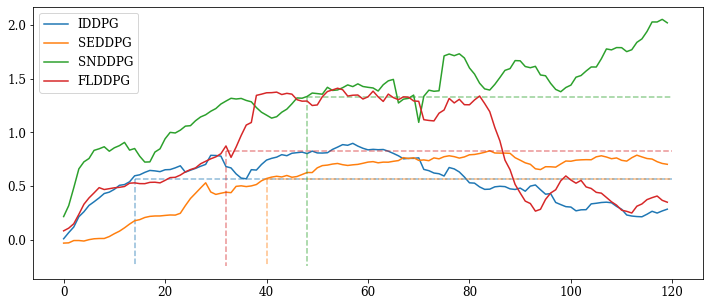

In [9]:
EPISODES = 120 # conv_means[0].shape[0]
CONVOLUTION_SIZE = 5

xs = np.arange(EPISODES)
conv_means = [np.convolve(means[i].rewards[:EPISODES + CONVOLUTION_SIZE - 1], np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards[:EPISODES + CONVOLUTION_SIZE - 1], np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], absolute_means[i]) for i in range(M)]

colors =  plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(12, 5))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors[i])
    plt.plot((absolute_means_episode[i], len(xs)), (absolute_means[i], absolute_means[i]), c=colors[i], linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (absolute_means[i], -0.25), c=colors[i], linestyle='--', alpha=0.5)
plt.legend()
plt.show()

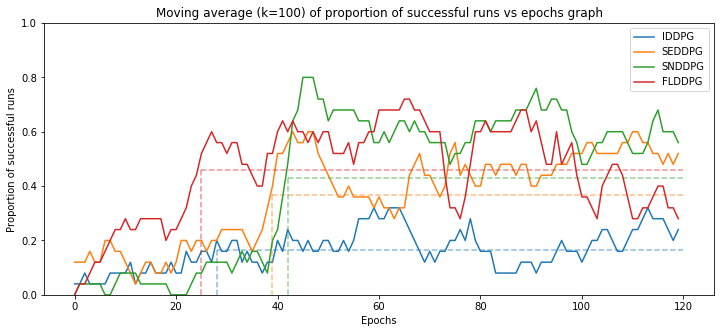

In [59]:
EPISODES = 120 # conv_means[0].shape[0]
CONVOLUTION_SIZE = 5

xs = np.arange(EPISODES)
conv_succ = [np.convolve(means[i].succeded[:EPISODES + CONVOLUTION_SIZE - 1], np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded[:EPISODES + CONVOLUTION_SIZE - 1], np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], absolute_succ[i]) for i in range(M)]

colors =  plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(12, 5))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i])
    plt.plot((absolute_succ_episode[i], len(xs)), (absolute_succ[i], absolute_succ[i]), c=colors[i], linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (absolute_succ[i], 0), c=colors[i], linestyle='--', alpha=0.5)
plt.title('Moving average (k=100) of proportion of successful runs vs epochs graph')
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
plt.show()

## Methods: $\gamma$

In [211]:
M = 3
methods = [r'$\gamma = 0.8$',
           r'$\gamma = 0.9$',
           r'$\gamma = 0.999$',]

path_data_g_08 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*6+1)]
path_data_g_09 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*6+1)]
path_data_g_0999 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*6+1)]

path_name_g_08 = ['IDDPG{}-{}'.format('-g-0.8', i) for i in range(1, 6+1)] \
               + ['SEDDPG{}-{}'.format('-g-0.8', i) for i in range(1, 6+1)] \
               + ['SNDDPG{}-{}'.format('-g-0.8', i) for i in range(1, 6+1)] \
               #+ ['FLDDPG{}-{}'.format('-g-0.8', i) for i in range(1, 6+1)]
path_name_g_09 = ['IDDPG{}-{}'.format('-5-short', i) for i in range(1, 6+1)] \
               + ['SEDDPG{}-{}'.format('-5-short', i) for i in range(1, 6+1)] \
               + ['SNDDPG{}-{}'.format('-5-short', i) for i in range(1, 6+1)] \
               #+ ['FLDDPG{}-{}'.format('-5-short', i) for i in range(1, 6+1)]
path_name_g_0999 = ['IDDPG{}-{}'.format('-g-0.999', i) for i in range(1, 6+1)] \
               + ['SEDDPG{}-{}'.format('-g-0.999', i) for i in range(1, 6+1)] \
               + ['SNDDPG{}-{}'.format('-g-0.999', i) for i in range(1, 6+1)] \
               #+ ['FLDDPG{}-{}'.format('-g-0.999', i) for i in range(1, 6+1)]

exp_g_08 = load_multiple_experiments(path_data_g_08, path_name_g_08)
exp_g_09 = load_multiple_experiments(path_data_g_09, path_name_g_09)
exp_g_0999 = load_multiple_experiments(path_data_g_0999, path_name_g_0999)
exp = [exp_g_08, exp_g_09, exp_g_0999]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

1.2199036965813053
1.418499714883919
1.197457385434973


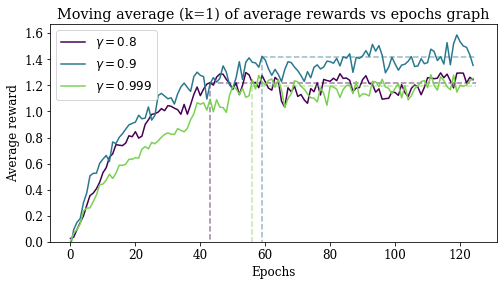

In [212]:
CONVOLUTION_SIZE = 1
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_means[i])
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.39155555555555566 +- 0.2341995901449534
0.49111111111111116 +- 0.23619368135660182
0.4062222222222222 +- 0.2741481326353146


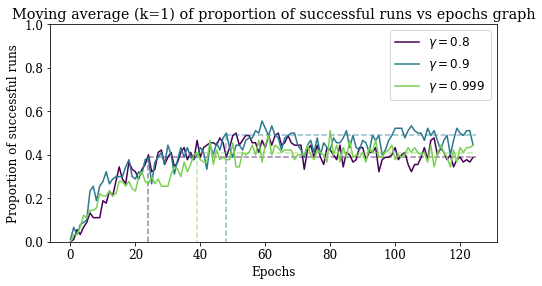

In [213]:
CONVOLUTION_SIZE = 1
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
late_absolute_std = [np.mean(conv_stds[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i], "+-", late_absolute_std[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

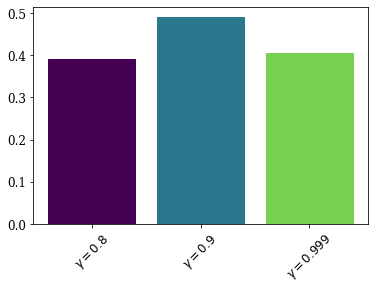

In [214]:
plt.xticks(rotation=45)
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(C * index))


## Methods: $\rho$

In [216]:
M = 3
methods = [r'$\rho = 0.1$',
           r'$\rho = 0.5$',
           r'$\rho = 1.0$',]

path_data_r_01 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*4+1)]
path_data_r_05 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*4+1)]
path_data_r_10 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3*4+1)]

path_name_r_01 = ['IDDPG{}-{}'.format('-r-0.1', i) for i in range(1, 4+1)] \
               + ['SEDDPG{}-{}'.format('-r-0.1', i) for i in range(1, 4+1)] \
               + ['SNDDPG{}-{}'.format('-r-0.1', i) for i in range(1, 4+1)] \
               #+ ['FLDDPG{}-{}'.format('-r-0.1', i) for i in range(1, 4+1)]
path_name_r_05 = ['IDDPG{}-{}'.format('-r-0.5', i) for i in range(1, 4+1)] \
               + ['SEDDPG{}-{}'.format('-r-0.5', i) for i in range(1, 4+1)] \
               + ['SNDDPG{}-{}'.format('-r-0.5', i) for i in range(1, 4+1)] \
               #+ ['FLDDPG{}-{}'.format('-r-0.5', i) for i in range(1, 4+1)]
path_name_r_10 = ['IDDPG{}-{}'.format('-5-short', i) for i in range(1, 4+1)] \
               + ['SEDDPG{}-{}'.format('-5-short', i) for i in range(1, 4+1)] \
               + ['SNDDPG{}-{}'.format('-5-short', i) for i in range(1, 4+1)] \
               #+ ['FLDDPG{}-{}'.format('-5-short', i) for i in range(1, 4+1)]

exp_r_01 = load_multiple_experiments(path_data_r_01, path_name_r_01)
exp_r_05 = load_multiple_experiments(path_data_r_05, path_name_r_05)
exp_r_10 = load_multiple_experiments(path_data_r_10, path_name_r_10)
exp = [exp_r_01, exp_r_05, exp_r_10]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

1.1199366032743903
1.2357850735750608
1.345019152022305


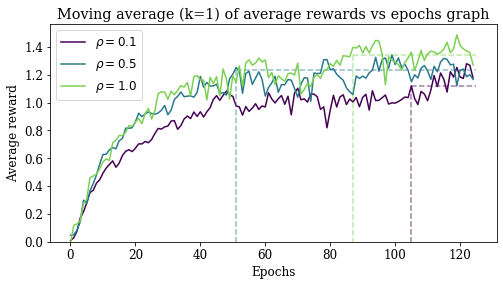

In [217]:
CONVOLUTION_SIZE = 1
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_means[i])
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.4122222222222222 +- 0.04420171814675557
0.3774603174603175 +- 0.03631002254840055
0.48857142857142855 +- 0.01858973456756489


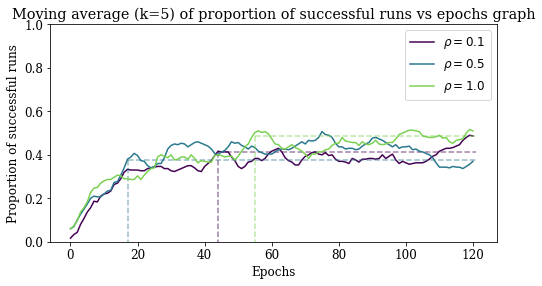

In [218]:
CONVOLUTION_SIZE = 5
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
late_absolute_std = [np.std(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i], '+-', late_absolute_std[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

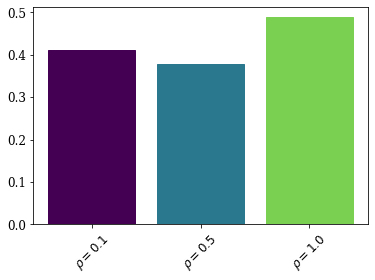

In [219]:
plt.xticks(rotation=45)
colors = plt.get_cmap('viridis')
C = 1 / (M-0.5)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(C * index))


## Methods: $|\mathcal{D}|$

### IDDPG

In [189]:
method_name = 'IDDPG'
color_map_name = 'cividis'

methods = [r'$|\mathcal{D}| = $ 10 000',
           r'$|\mathcal{D}| = $ 30 000',
           r'$|\mathcal{D}| = $ 50 000',
           r'$|\mathcal{D}| = $ 70 000',]
M = len(methods)

path_data_b_10000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_30000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_50000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 16+1)]
path_data_b_70000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_b_10000 = ['{}{}-{}'.format(method_name, '-b-10000', i) for i in range(1, 8+1)]
path_name_b_30000 = ['{}{}-{}'.format(method_name, '-b-30000', i) for i in range(1, 8+1)]
path_name_b_50000 = ['{}{}-{}'.format(method_name, '-5-short', i) for i in range(1, 16+1)]
path_name_b_70000 = ['{}{}-{}'.format(method_name, '-b-70000', i) for i in range(1, 4+1)]

exp_b_10000 = load_multiple_experiments(path_data_b_10000, path_name_b_10000)
exp_b_30000 = load_multiple_experiments(path_data_b_30000, path_name_b_30000)
exp_b_50000 = load_multiple_experiments(path_data_b_50000, path_name_b_50000)
exp_b_70000 = load_multiple_experiments(path_data_b_70000, path_name_b_70000)

exp = [exp_b_10000, 
       exp_b_30000,
       exp_b_50000,
       exp_b_70000,]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

0.6588646533763783
0.7994831201395635
0.7769717917228971
0.6794880626971666


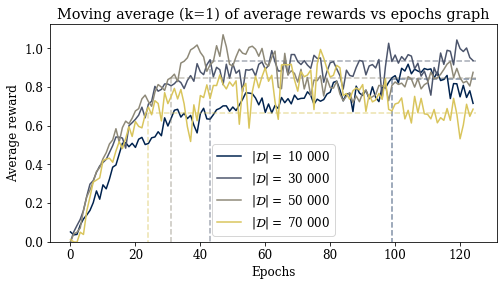

In [190]:
CONVOLUTION_SIZE = 1
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(absolute_means[i])
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.25800000000000006 +- 0.1630858919084972
0.31600000000000006 +- 0.1622237669323826
0.31100000000000005 +- 0.18798811732377543
0.24 +- 0.1588157022304754


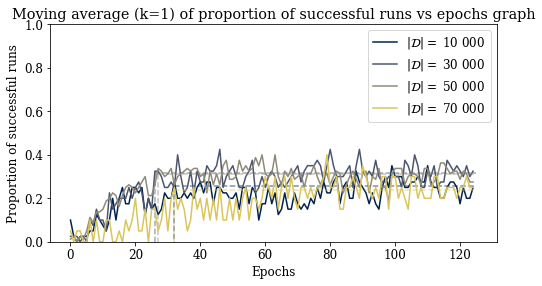

In [191]:
CONVOLUTION_SIZE = 1
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
late_absolute_std = [np.mean(conv_stds[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i], "+-", late_absolute_std[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

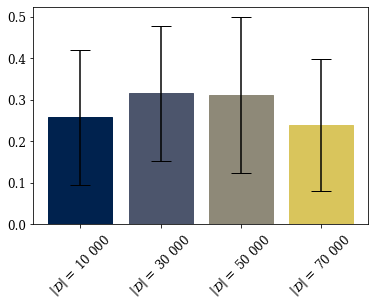

In [192]:
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)
plt.xticks(rotation=45)
bar_list = plt.bar(methods[0:M:1], late_absolute_succ, yerr=late_absolute_std, capsize=10)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.show()

### SEDDPG

In [163]:
method_name = 'SEDDPG'
color_map_name = 'inferno'

methods = [
           #r'$|\mathcal{D}| = 10\,000$',
           r'$|\mathcal{D}| = 30\,000$',
           r'$|\mathcal{D}| = 50\,000$',
           r'$|\mathcal{D}| = 70\,000$',]
M = len(methods)

#path_data_b_10000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_b_30000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_b_50000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 16+1)]
path_data_b_70000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

#path_name_b_10000 = ['{}{}-{}'.format(method_name, '-b-10000', i) for i in range(1, 4+1)]
path_name_b_30000 = ['{}{}-{}'.format(method_name, '-b-30000', i) for i in range(1, 4+1)]
path_name_b_50000 = ['{}{}-{}'.format(method_name, '-5-short', i) for i in range(1, 16+1)]
path_name_b_70000 = ['{}{}-{}'.format(method_name, '-b-70000', i) for i in range(1, 4+1)]

#exp_b_10000 = load_multiple_experiments(path_data_b_10000, path_name_b_10000)
exp_b_30000 = load_multiple_experiments(path_data_b_30000, path_name_b_30000)
exp_b_50000 = load_multiple_experiments(path_data_b_50000, path_name_b_50000)
exp_b_70000 = load_multiple_experiments(path_data_b_70000, path_name_b_70000)

exp = [
       #exp_b_10000, 
       exp_b_30000,
       exp_b_50000,
       exp_b_70000,]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

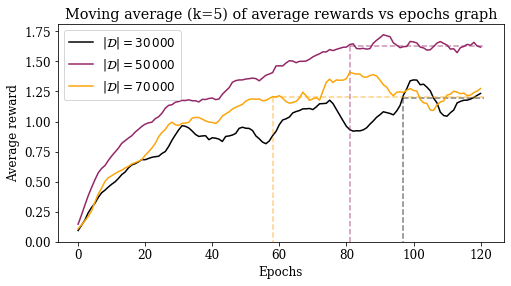

In [164]:
CONVOLUTION_SIZE = 5
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.4776190476190478
0.5432142857142858
0.46238095238095245


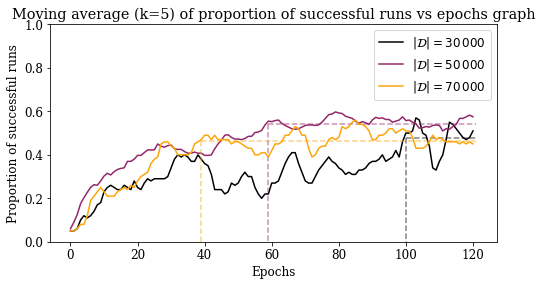

In [165]:
CONVOLUTION_SIZE = 5
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

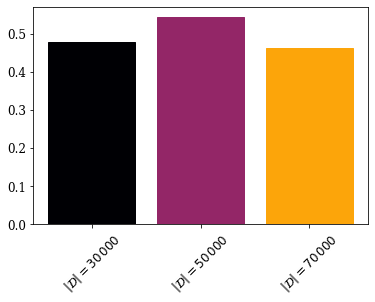

In [166]:
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)
plt.xticks(rotation=45)
bar_list = plt.bar(methods[0:M:1], late_absolute_succ[0:M:1])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.show()

### SNDDPG

In [27]:
method_name = 'SNDDPG'
color_map_name = 'viridis'

methods = [r'$|\mathcal{D}| = $ 30 000',
           r'$|\mathcal{D}| = $ 50 000',
           r'$|\mathcal{D}| = $ 70 000',
           r'$|\mathcal{D}| = $ 100 000',]
M = len(methods)

path_data_b_30000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_b_50000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 16+1)]
path_data_b_70000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_100000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_b_30000 = ['{}{}-{}'.format(method_name, '-b-30000', i) for i in range(1, 4+1)]
path_name_b_50000 = ['{}{}-{}'.format(method_name, '-5-short', i) for i in range(1, 16+1)]
path_name_b_70000 = ['{}{}-{}'.format(method_name, '-b-70000', i) for i in range(1, 8+1)]
path_name_b_100000 = ['{}{}-{}'.format(method_name, '-b-100000', i) for i in range(1, 4+1)]

exp_b_30000 = load_multiple_experiments(path_data_b_30000, path_name_b_30000)
exp_b_50000 = load_multiple_experiments(path_data_b_50000, path_name_b_50000)
exp_b_70000 = load_multiple_experiments(path_data_b_70000, path_name_b_70000)
exp_b_100000 = load_multiple_experiments(path_data_b_100000, path_name_b_100000)

exp = [exp_b_30000,
       exp_b_50000,
       exp_b_70000,
       exp_b_100000,]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

1.6642637387201926
1.576226155846737
1.6809477372847546
1.235160908561116


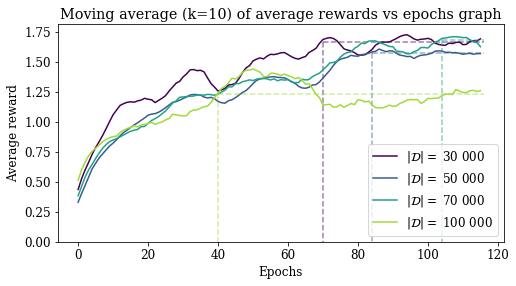

In [28]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_means[i])
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.423125
0.5260156250000001
0.5682812500000001
0.5325


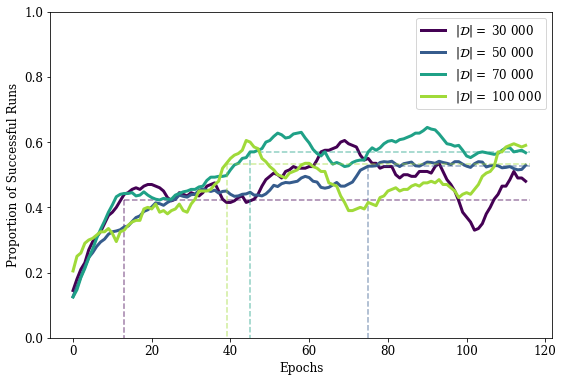

In [29]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(9, 6))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), linewidth=3)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
#plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of Successful Runs')
plt.ylim(0, 1)
plt.legend()
plt.savefig('buffer-sn-plot-2.png', dpi=200)
plt.show()

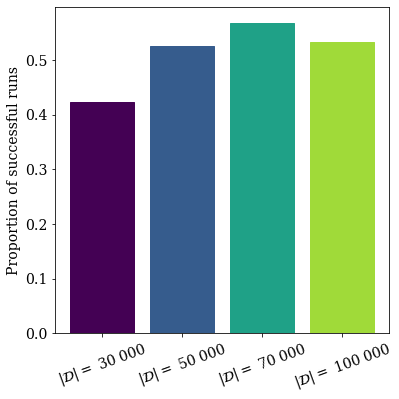

In [126]:
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)
plt.figure(figsize=(6, 6))
plt.xticks(rotation=20)
bar_list = plt.bar(methods[0:M:1], late_absolute_succ[0:M:1])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylabel('Proportion of successful runs')
plt.savefig('buffer-sn-bar.png', dpi=200)
plt.show()

### FLDDPG Hard

In [9]:
method_name = 'FLDDPG'
color_map_name = 'plasma'

methods = [
           r'$|\mathcal{D}| = 5\,000$',
           r'$|\mathcal{D}| = 10\,000$',
           r'$|\mathcal{D}| = 30\,000$',
           r'$|\mathcal{D}| = 50\,000$',
           r'$|\mathcal{D}| = 70\,000$',
           ]
M = len(methods)

path_data_b_5000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_10000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_30000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 3+1)]
path_data_b_50000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_70000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_b_5000 = ['{}{}-{}'.format(method_name, '-h-b-5000', i) for i in range(1, 8+1)]
path_name_b_10000 = ['{}{}-{}'.format(method_name, '-h-b-10000', i) for i in range(1, 8+1)]
path_name_b_30000 = ['{}{}-{}'.format(method_name, '-h-b-30000', i) for i in range(1, 3+1)]
path_name_b_50000 = ['{}{}-{}'.format(method_name, '-h-b-50000', i) for i in range(1, 8+1)]
path_name_b_70000 = ['{}{}-{}'.format(method_name, '-h-b-70000', i) for i in range(1, 4+1)]

exp_b_5000 = load_multiple_experiments(path_data_b_5000, path_name_b_5000)
exp_b_10000 = load_multiple_experiments(path_data_b_10000, path_name_b_10000)
exp_b_30000 = load_multiple_experiments(path_data_b_30000, path_name_b_30000)
exp_b_50000 = load_multiple_experiments(path_data_b_50000, path_name_b_50000)
exp_b_70000 = load_multiple_experiments(path_data_b_70000, path_name_b_70000)

exp = [
       exp_b_5000,
       exp_b_10000, 
       exp_b_30000,
       exp_b_50000,
       exp_b_70000,
       ]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

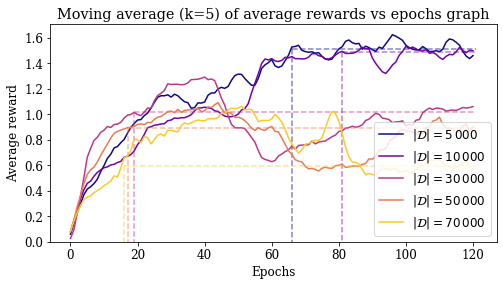

In [11]:
CONVOLUTION_SIZE = 5
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.47785714285714287
0.4947619047619048
0.36444444444444446
0.3633333333333334
0.31000000000000005


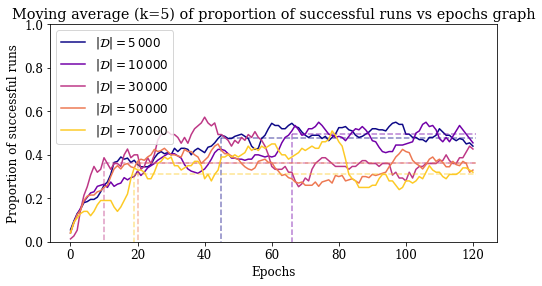

In [12]:
CONVOLUTION_SIZE = 5
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

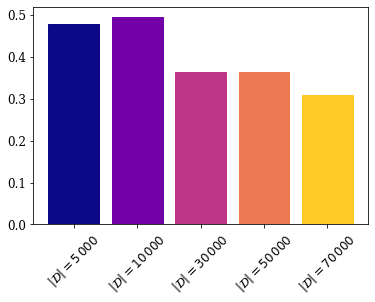

In [13]:
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)
plt.xticks(rotation=45)
bar_list = plt.bar(methods[0:M:1], late_absolute_succ[0:M:1])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.show()

### FLDDPG Soft

In [271]:
method_name = 'FLDDPG'
color_map_name = 'plasma'

methods = [r'$|\mathcal{D}| = 5\,000$',
           r'$|\mathcal{D}| = 10\,000$',
           r'$|\mathcal{D}| = 30\,000$',
           r'$|\mathcal{D}| = 50\,000$',
           r'$|\mathcal{D}| = 70\,000$',
           ]
M = len(methods)

path_data_b_5000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_b_10000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_b_30000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_b_50000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 16+1)]
path_data_b_70000 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_b_5000 = ['{}{}-{}'.format(method_name, '-b-5000', i) for i in range(1, 4+1)]
path_name_b_10000 = ['{}{}-{}'.format(method_name, '-b-10000', i) for i in range(1, 8+1)]
path_name_b_30000 = ['{}{}-{}'.format(method_name, '-b-30000', i) for i in range(1, 4+1)]
path_name_b_50000 = ['{}{}-{}'.format(method_name, '-5-short', i) for i in range(1, 16+1)]
path_name_b_70000 = ['{}{}-{}'.format(method_name, '-b-70000', i) for i in range(1, 4+1)]

exp_b_5000 = load_multiple_experiments(path_data_b_5000, path_name_b_5000)
exp_b_10000 = load_multiple_experiments(path_data_b_10000, path_name_b_10000)
exp_b_30000 = load_multiple_experiments(path_data_b_30000, path_name_b_30000)
exp_b_50000 = load_multiple_experiments(path_data_b_50000, path_name_b_50000)
exp_b_70000 = load_multiple_experiments(path_data_b_70000, path_name_b_70000)

exp = [exp_b_5000,
       exp_b_10000, 
       exp_b_30000,
       exp_b_50000,
       exp_b_70000,
       ]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

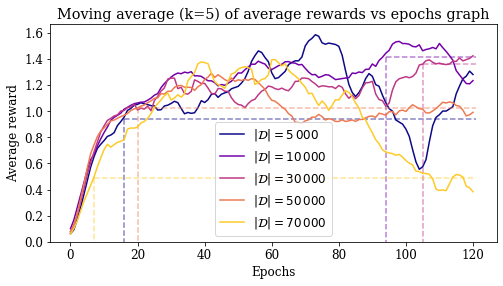

In [272]:
CONVOLUTION_SIZE = 5
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()


0.350952380952381
0.47190476190476194
0.4385714285714286
0.4560714285714287
0.24428571428571436


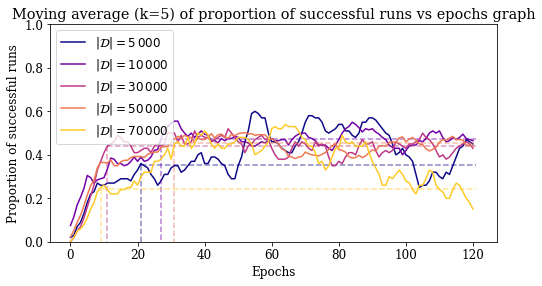

In [273]:
CONVOLUTION_SIZE = 5
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(8, 4))
for i in range(0, M, 1):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

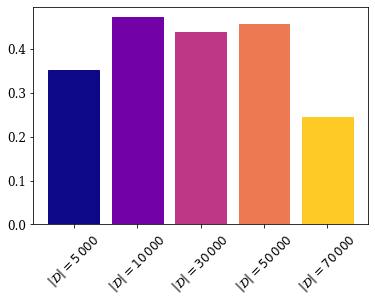

In [274]:
colors = plt.get_cmap(color_map_name)
C = 1 / (M-0.5)
plt.xticks(rotation=45)
bar_list = plt.bar(methods[0:M:1], late_absolute_succ[0:M:1])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.show()

## FLDDPG $\tau$: Individual $\times$ Soft $\times$ Hard

In [17]:
M = 3
methods = [r'$\tau = $ 0.0; individual', 
           r'$\tau = $ 0.5; soft', 
           r'$\tau = $ 1.0; hard']

path_data_indi = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_soft = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_hard = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 10+1)]

path_name_indi = ['IDDPG{}-{}'.format('-b-10000', i) for i in range(1, 8+1)]
path_name_soft = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_hard = ['FLDDPG{}-{}'.format('-h-p-2', i) for i in range(1, 10+1)]

exp_indi = load_multiple_experiments(path_data_indi, path_name_indi)
exp_soft = load_multiple_experiments(path_data_soft, path_name_soft)
exp_hard = load_multiple_experiments(path_data_hard, path_name_hard)
exp = [exp_indi, exp_soft, exp_hard]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

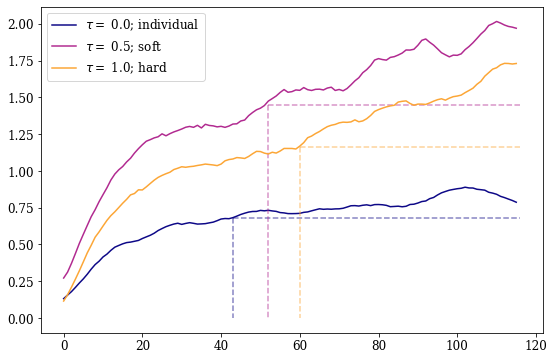

In [18]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors_tab = plt.get_cmap('tab10')
D = 0
colors = plt.get_cmap('plasma')
C = 1 / (M-0.5)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15, color=colors(C*i))
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (absolute_means[i], absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
#plt.ylim(0)
plt.legend()
plt.show()

0.259375
0.7889062500000001
0.606125


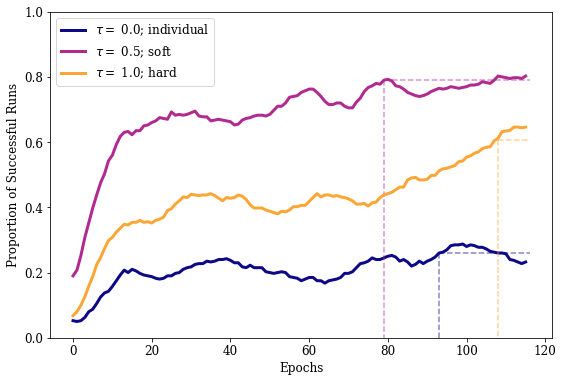

In [21]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]

absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors_tab = plt.get_cmap('tab10')
D = 0
colors = plt.get_cmap('plasma')
C = 1 / (M-0.5)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), linewidth=3)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15, color=colors(C*i))
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
#plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of Successful Runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('soft-plot.png', dpi=200)
plt.show()

Text(0, 0.5, 'Proportion of successful runs')

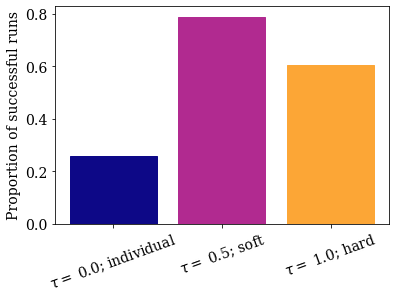

In [121]:
colors = plt.get_cmap('plasma')
C = 1 / (M-0.5)

plt.xticks(rotation=20)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    if index >= 3:
        bar.set_color(colors_tab(index+D))        
        continue
    bar.set_color(colors(index*C))
plt.ylabel('Proportion of successful runs')


## FLDDPG $T_{update}, E_{update}$: Update period

### ...

In [22]:

methods = [
    r'$T_{update} = 16$',
    r'$T_{update} = 32$',
    r'$T_{update} = 64$',
    r'$T_{update} = 128$',
    r'$T_{update} = 256$', 
    r'$T_{update} = 512$', 
    r'$E_{update} = 1$', 
    r'$E_{update} = 2$', 
    r'$E_{update} = 3$',
    r'$E_{update} = 5$',
    r'$E_{update} = 10$',
    ]
M = len(methods)

path_data_t_16 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_t_32 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_t_64 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 10+1)]
path_data_t_128 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_t_256 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 10+1)]
path_data_t_512 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_e_1 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_e_2 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 10+1)]
path_data_e_3 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_e_5 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_e_10 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 10+1)]

path_name_t_16 = ['FLDDPG{}-{}'.format('-h-p-16', i) for i in range(1, 8+1)]
path_name_t_32 = ['FLDDPG{}-{}'.format('-h-p-32', i) for i in range(1, 8+1)]
path_name_t_64 = ['FLDDPG{}-{}'.format('-h-p-64', i) for i in range(1, 10+1)]
path_name_t_128 = ['FLDDPG{}-{}'.format('-h-p-128', i) for i in range(1, 8+1)]
path_name_t_256 = ['FLDDPG{}-{}'.format('-h-p-256', i) for i in range(1, 10+1)]
path_name_t_512 = ['FLDDPG{}-{}'.format('-h-p-512', i) for i in range(1, 8+1)]
path_name_e_1 = ['FLDDPG{}-{}'.format('-h-b-10000', i) for i in range(1, 8+1)]
path_name_e_2 = ['FLDDPG{}-{}'.format('-h-p-2', i) for i in range(1, 10+1)]
path_name_e_3 = ['FLDDPG{}-{}'.format('-h-p-3', i) for i in range(1, 8+1)]
path_name_e_5 = ['FLDDPG{}-{}'.format('-h-p-5', i) for i in range(1, 8+1)]
path_name_e_10 = ['FLDDPG{}-{}'.format('-h-p-10', i) for i in range(1, 10+1)]

exp_t_16 = load_multiple_experiments(path_data_t_16, path_name_t_16)
exp_t_32 = load_multiple_experiments(path_data_t_32, path_name_t_32)
exp_t_64 = load_multiple_experiments(path_data_t_64, path_name_t_64)
exp_t_128 = load_multiple_experiments(path_data_t_128, path_name_t_128)
exp_t_256 = load_multiple_experiments(path_data_t_256, path_name_t_256)
exp_t_512 = load_multiple_experiments(path_data_t_512, path_name_t_512)
exp_e_1 = load_multiple_experiments(path_data_e_1, path_name_e_1)
exp_e_2 = load_multiple_experiments(path_data_e_2, path_name_e_2)
exp_e_3 = load_multiple_experiments(path_data_e_3, path_name_e_3)
exp_e_5 = load_multiple_experiments(path_data_e_5, path_name_e_5)
exp_e_10 = load_multiple_experiments(path_data_e_10, path_name_e_10)

exp = [
    exp_t_16, 
    exp_t_32, 
    exp_t_64, 
    exp_t_128, 
    exp_t_256, 
    exp_t_512, 
    exp_e_1, 
    exp_e_2, 
    exp_e_3,
    exp_e_5,
    exp_e_10,
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

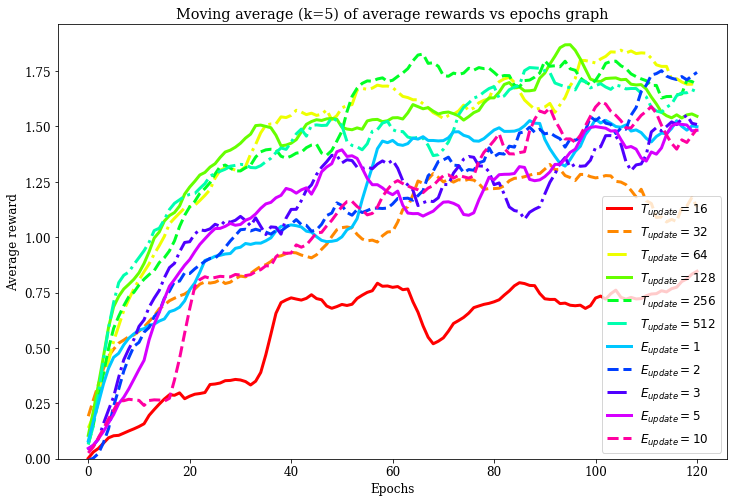

In [23]:
CONVOLUTION_SIZE = 5
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
late_absolute_means_stds = [np.mean(conv_stds[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('hsv')
C = 1 / (M)

plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i), linewidth=3, linestyle=LINES[i % LINES_COUNT])
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    #plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    #plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()

0.27875000000000005 +- 0.31845853697497795
0.34953124999999996 +- 0.26921159607724165
0.6275 +- 0.1601087956163392
0.54625 +- 0.19529036438220332
0.5852499999999999 +- 0.1402464046626299
0.5321875 +- 0.1860351889993882
0.4978125 +- 0.22209198120586382
0.606125 +- 0.16958583239630004
0.479375 +- 0.24635200390739095
0.47343749999999996 +- 0.22454055579678317
0.4970000000000001 +- 0.16543961171279387


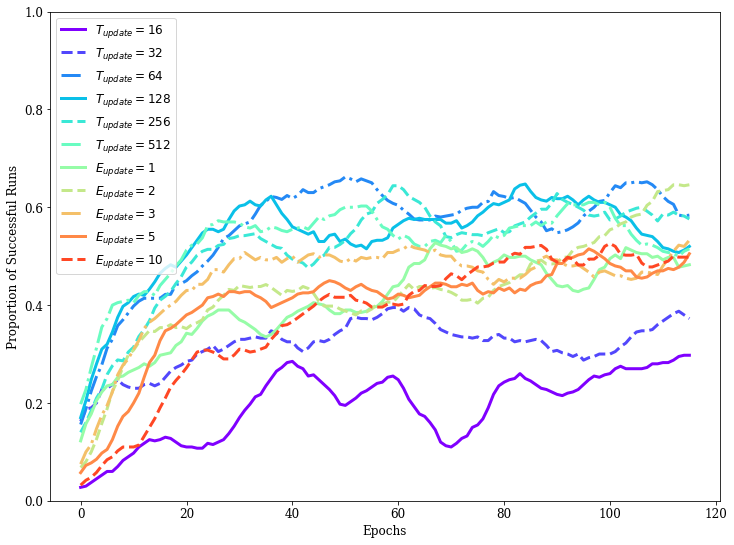

In [25]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
late_absolute_succ_stds = [np.mean(conv_stds[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 9))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), 
             linewidth=3,
             linestyle=LINES[i % LINES_COUNT]
             )
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15, color=colors(C*i))
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    #plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    #plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i], '+-', late_absolute_succ_stds[i])
#plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of Successful Runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('period-plot.png', dpi=200)
plt.show()

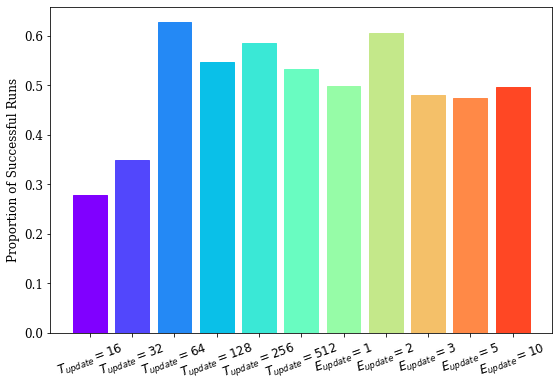

In [26]:
colors = plt.get_cmap('rainbow')
C = 1 / (M)

plt.figure(figsize=(9, 6))
plt.xticks(rotation=20)
bar_list = plt.bar(
            methods, late_absolute_succ, 
            #yerr=late_absolute_succ_stds, capsize=16,
            )
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))
plt.ylabel('Proportion of Successful Runs')
plt.savefig('period-bar.png', dpi=200)


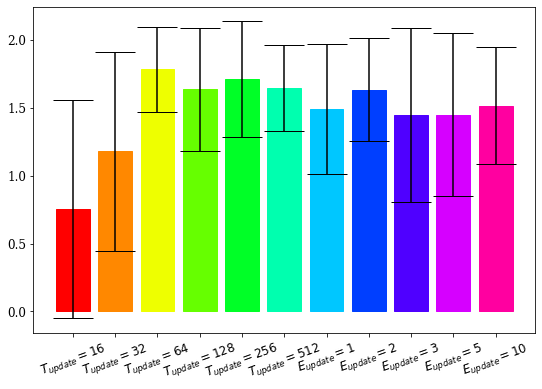

In [10]:
colors = plt.get_cmap('hsv')
C = 1 / (M)

plt.figure(figsize=(9, 6))
plt.xticks(rotation=20)
bar_list = plt.bar(methods, late_absolute_means, yerr=late_absolute_means_stds, capsize=20)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))


## PWDDPG

In [55]:
methods = [
    'FLDDPG', 
    r'PWDDPG; $\beta = 0.25$',
    r'PWDDPG; $\beta = 0.5$',
    r'PWDDPG; $\beta = 1.0$',
    #r'PWDDPG; $\beta = 1.5$',
]
M = len(methods)

path_data_fl = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_pw_exp_025 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_pw_exp_05 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_pw_exp_t1 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_pw_exp_15 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_fl = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_pw_exp_025 = ['PWDDPG{}-{}'.format('-b-0.25', i) for i in range(1, 8+1)]
path_name_pw_exp_05 = ['PWDDPG{}-{}'.format('-b-0.5', i) for i in range(1, 8+1)]
path_name_pw_exp_t1 = ['PWDDPG{}-{}'.format('-b-1.0', i) for i in range(1, 8+1)]
path_name_pw_exp_15 = ['PWDDPG{}-{}'.format('-b-1.5', i) for i in range(1, 4+1)]

exp_fl = load_multiple_experiments(path_data_fl, path_name_fl)
exp_pw_exp_025 = load_multiple_experiments(path_data_pw_exp_025, path_name_pw_exp_025)
exp_pw_exp_05 = load_multiple_experiments(path_data_pw_exp_05, path_name_pw_exp_05)
exp_pw_exp_t1 = load_multiple_experiments(path_data_pw_exp_t1, path_name_pw_exp_t1)
exp_pw_exp_15 = load_multiple_experiments(path_data_pw_exp_15, path_name_pw_exp_15)
exp = [
    exp_fl, 
    exp_pw_exp_025, 
    exp_pw_exp_05, 
    exp_pw_exp_t1, 
    #exp_pw_exp_15
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

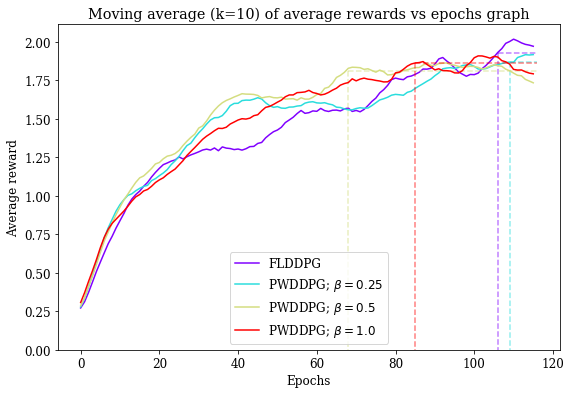

In [67]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
plt.ylim(0)
plt.legend()
plt.show()

0.7889062500000001
0.7423437500000001
0.75265625
0.7675000000000001


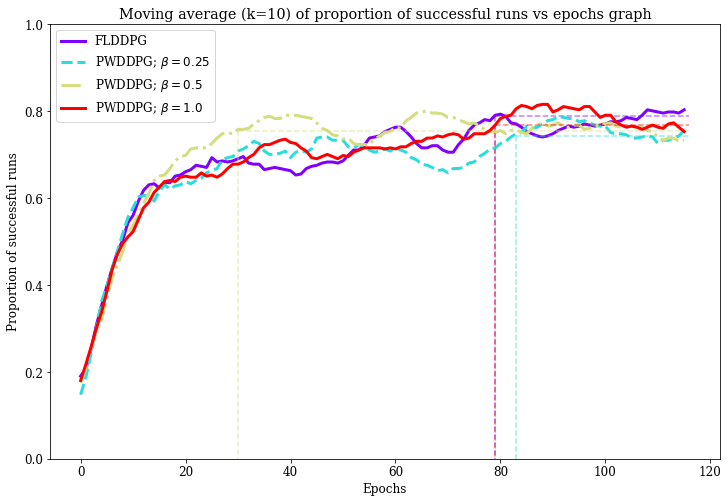

In [68]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
#colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), 
        linewidth=3,
        linestyle=LINES[i % LINES_COUNT],
        )
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

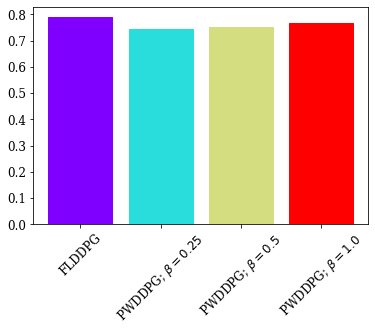

In [69]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))

## RWDDPG

In [10]:
M = 4
methods = [
       'FLDDPG',
       r'RWDDPG; $\beta = 0.25$', 
       r'RWDDPG; $\beta = 0.5$',
       r'RWDDPG; $\beta = 1.0$',
       r'RWDDPG; $\beta = 1.5$',
       r'RWDDPG; $\beta = 2.0$',
]
M = len(methods)

path_data_fl = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_025 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]
path_data_05 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_10 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_15 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_20 = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_fl = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_025 = ['RWDDPG{}-{}'.format('-b-0.25', i) for i in range(1, 4+1)]
path_name_05 = ['RWDDPG{}-{}'.format('-b-0.5', i) for i in range(1, 8+1)]
path_name_10 = ['RWDDPG{}-{}'.format('-b-1.0', i) for i in range(1, 8+1)]
path_name_15 = ['RWDDPG{}-{}'.format('-b-1.5', i) for i in range(1, 8+1)]
path_name_20 = ['RWDDPG{}-{}'.format('-b-2.0', i) for i in range(1, 4+1)]

exp_fl = load_multiple_experiments(path_data_fl, path_name_fl)
exp_025 = load_multiple_experiments(path_data_025, path_name_025)
exp_05 = load_multiple_experiments(path_data_05, path_name_05)
exp_10 = load_multiple_experiments(path_data_10, path_name_10)
exp_15 = load_multiple_experiments(path_data_15, path_name_15)
exp_20 = load_multiple_experiments(path_data_20, path_name_20)
exp = [
       exp_fl, 
       exp_025, 
       exp_05, 
       exp_10,
       exp_15,
       exp_20,
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

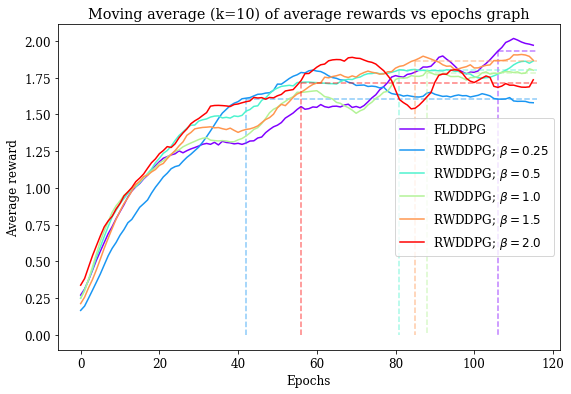

In [11]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
#plt.ylim(0)
plt.legend()
plt.show()

0.7889062500000001
0.7503124999999999
0.7626562500000001
0.7351562500000001
0.66890625
0.6781250000000001


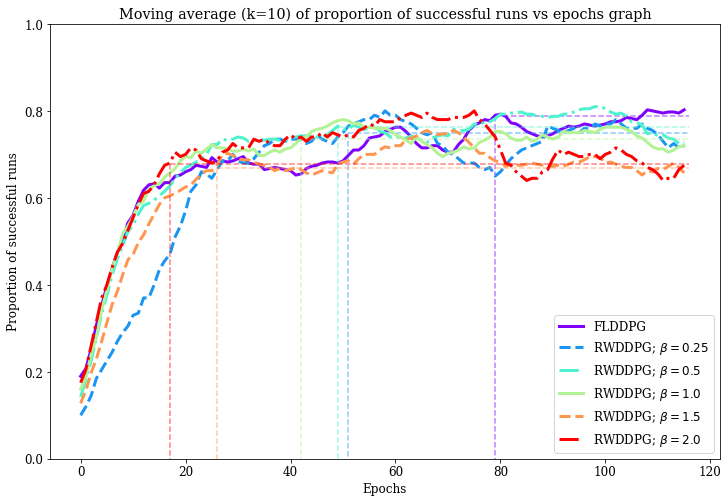

In [12]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), 
        linewidth=3,
        linestyle=LINES[i % LINES_COUNT],
        )
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

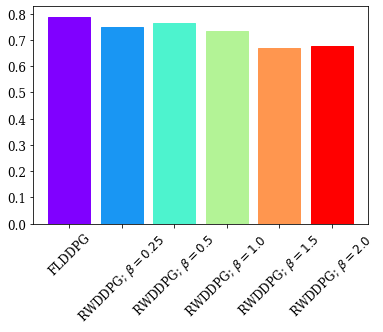

In [13]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))

## RWDDPG: Hard $\times$ Soft

In [14]:
M = 4
methods = [
       r'FLDDPG; hard',
       r'RWDDPG; soft; $\beta = 0.5$',
       r'RWDDPG; hard; $\beta = 0.5$',
]
M = len(methods)

path_data_flh = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_s = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_h = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]

path_name_flh = ['FLDDPG{}-{}'.format('-h-p-2', i) for i in range(1, 8+1)]
path_name_s = ['RWDDPG{}-{}'.format('-b-0.5', i) for i in range(1, 8+1)]
path_name_h = ['RWDDPG{}-{}'.format('-h', i) for i in range(1, 8+1)]

exp_flh = load_multiple_experiments(path_data_flh, path_name_flh)
exp_s = load_multiple_experiments(path_data_s, path_name_s)
exp_h = load_multiple_experiments(path_data_h, path_name_h)
exp = [
       exp_flh,
       exp_s,
       exp_h,
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

/home/pikmanjan/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


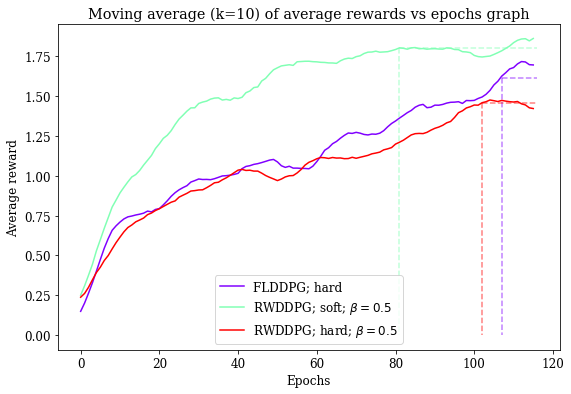

In [15]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
#plt.ylim(0)
plt.legend()
plt.show()

0.60203125
0.7626562500000001
0.6321875


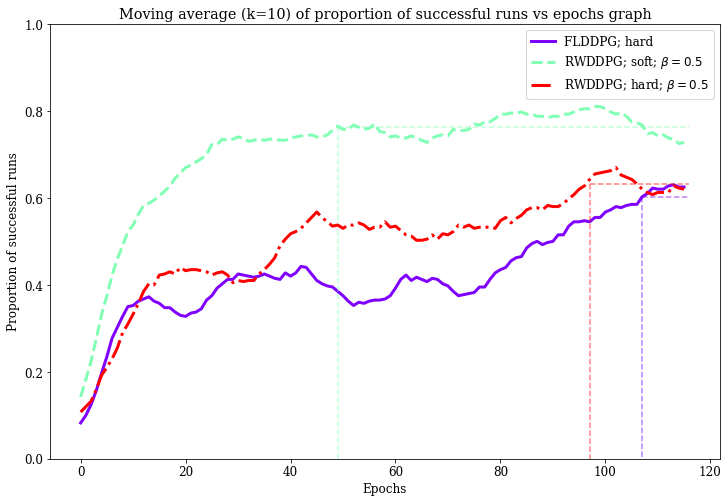

In [16]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
colors = plt.get_cmap('rainbow')
C = 1 / (M-1)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), 
        linewidth=3,
        linestyle=LINES[i % LINES_COUNT],
        )
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

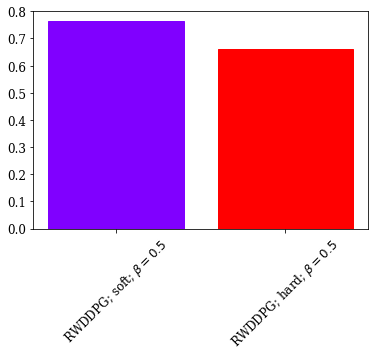

In [10]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))

## MADDPG

In [20]:
M = 4
methods = [
       'FLDDPG hard; \n' + r'$\tau = 1.0$; $\beta = 1.0$', 
       'FLDDPG soft; \n' + r'$\tau = 0.5$; $\beta = 1.0$', 
       'MADDPG hard; \n' + r'$\tau = 1.0$; $\beta = 0.5$',
       'MADDPG soft; \n' + r'$\tau = 0.5$; $\beta = 0.5$',
]
M = len(methods)

path_data_flh = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_fls = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_mah = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_mas = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_flh = ['FLDDPG{}-{}'.format('-h-p-2', i) for i in range(1, 8+1)]
path_name_fls = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_mah = ['MADDPG{}-{}'.format('-h-b-0.5', i) for i in range(1, 8+1)]
path_name_mas = ['MADDPG{}-{}'.format('-s-b-0.5', i) for i in range(1, 4+1)]

exp_flh = load_multiple_experiments(path_data_flh, path_name_flh)
exp_fls = load_multiple_experiments(path_data_fls, path_name_fls)
exp_mah = load_multiple_experiments(path_data_mah, path_name_mah)
exp_mas = load_multiple_experiments(path_data_mas, path_name_mas)
exp = [
       exp_flh, 
       exp_fls, 
       exp_mah,
       exp_mas,
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

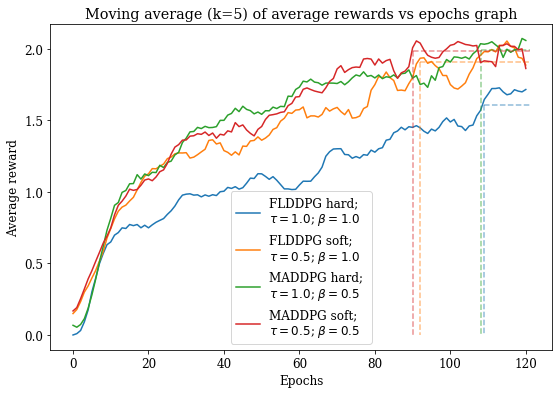

In [21]:
CONVOLUTION_SIZE = 5
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
#colors = plt.get_cmap('viridis')
C = 1 #/ (M-1)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
#plt.ylim(0)
plt.legend()
plt.show()

0.60203125
0.7889062500000001
0.71984375
0.7668750000000002


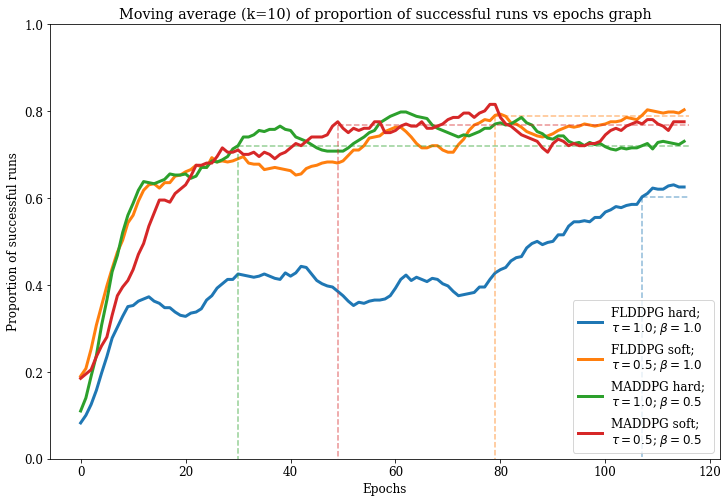

In [22]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
#colors = plt.get_cmap('viridis')
C = 1 #/ (M-1)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), linewidth=3)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

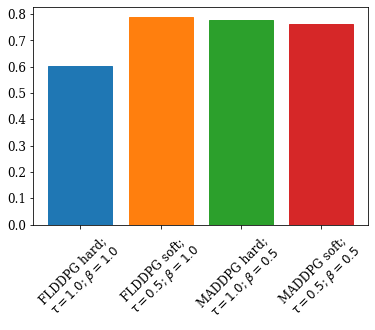

In [251]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))

## XmsDDPG

In [3]:
M = 4
methods = [
       'SNDDPG', 
       'SNsDDPG',
       'FLDDPG', 
       'FLsDDPG', 
]
M = len(methods)

path_data_sn = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_sns = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_fl = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_fls = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]

path_name_sn = ['SNDDPG{}-{}'.format('-b-70000', i) for i in range(1, 8+1)]
path_name_sns = ['SNDDPG{}-{}'.format('-ms', i) for i in range(1, 8+1)]
path_name_fl = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_fls = ['FLDDPG{}-{}'.format('-ms', i) for i in range(1, 8+1)]

exp_sn = load_multiple_experiments(path_data_sn, path_name_sn)
exp_sns = load_multiple_experiments(path_data_sns, path_name_sns)
exp_fl = load_multiple_experiments(path_data_fl, path_name_fl)
exp_fls = load_multiple_experiments(path_data_fls, path_name_fls)
exp = [
       exp_sn, 
       exp_sns,
       exp_fl, 
       exp_fls, 
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

/home/pikmanjan/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


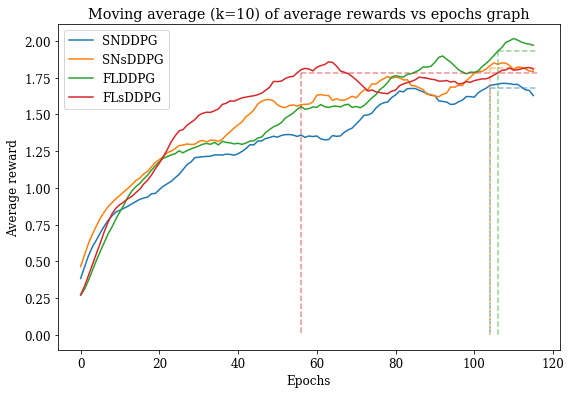

In [4]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
colors = plt.get_cmap('tab10')
#colors = plt.get_cmap('viridis')
C = 1 #/ (M-1)

plt.figure(figsize=(9, 6))
for i in range(M):
    plt.plot(xs, conv_means[i], label=methods[i], c=colors(C*i))
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=colors(C*i), linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
#plt.ylim(0)
plt.legend()
plt.show()

0.5682812500000001
0.65
0.7889062500000001
0.64984375


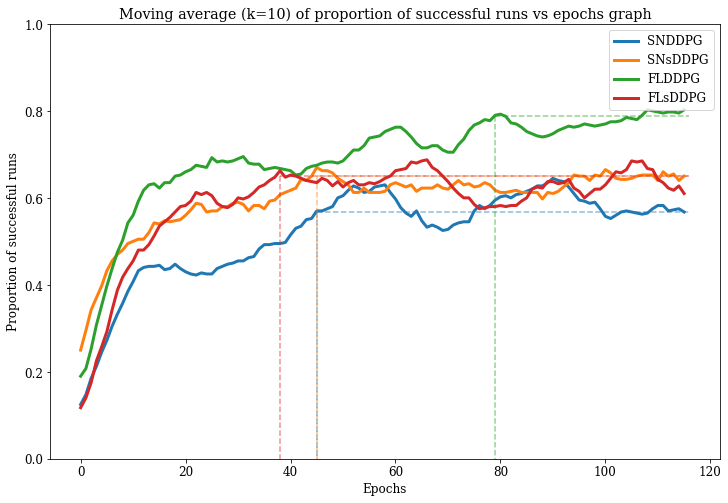

In [5]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
colors = plt.get_cmap('tab10')
#colors = plt.get_cmap('viridis')
C = 1 #/ (M-1)

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(xs, conv_succ[i], label=methods[i], c=colors(C*i), linewidth=3)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=colors(C*i), linestyle='--', alpha=0.5)
    plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=colors(C*i), linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
#plt.savefig('succeded.png', dpi=200)
plt.show()

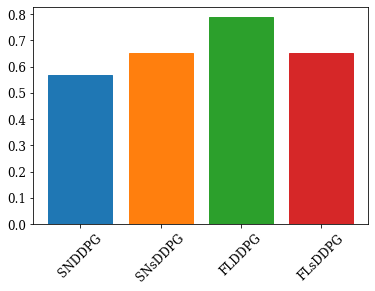

In [6]:
plt.xticks(rotation=45)
bar_list = plt.bar(methods, late_absolute_succ)
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C))

## Improvements

In [3]:
methods = [
       'SNDDPG', 
       'FLDDPG', 
       'PWDDPG',
       'RWDDPG', 
       'GSDDPG',
       'FLSDDPG',
       #'AllDDPG',
]
M = len(methods)

path_data_sn = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_fl = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_pw = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_rw = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_ga = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_s = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 8+1)]
path_data_all = ['/home/pikmanjan/fl4sr-evaluation/fl4sr-data' for i in range(1, 4+1)]

path_name_sn = ['SNDDPG{}-{}'.format('-b-70000', i) for i in range(1, 8+1)]
path_name_fl = ['FLDDPG{}-{}'.format('-s-p-2', i) for i in range(1, 8+1)]
path_name_pw = ['PWDDPG{}-{}'.format('-b-0.5', i) for i in range(1, 8+1)]
path_name_rw = ['RWDDPG{}-{}'.format('-b-0.5', i) for i in range(1, 8+1)]
path_name_ga = ['MADDPG{}-{}'.format('-h-b-0.5', i) for i in range(1, 8+1)]
path_name_s = ['FLDDPG{}-{}'.format('-ms', i) for i in range(1, 8+1)]
path_name_all = ['AllDDPG{}-{}'.format('', i) for i in range(1, 4+1)]

exp_sn = load_multiple_experiments(path_data_sn, path_name_sn)
exp_fl = load_multiple_experiments(path_data_fl, path_name_fl)
exp_pw = load_multiple_experiments(path_data_pw, path_name_pw)
exp_rw = load_multiple_experiments(path_data_rw, path_name_rw)
exp_ga = load_multiple_experiments(path_data_ga, path_name_ga)
exp_s = load_multiple_experiments(path_data_s, path_name_s)
exp_all = load_multiple_experiments(path_data_all, path_name_all)
exp = [
       exp_sn, 
       exp_fl,
       exp_pw,
       exp_rw,
       exp_ga,
       exp_s,
       #exp_all,
]

val = [average_experiment_values(e) for e in exp]

means = [mean_values(v) for v in val]
stds = [std_values(v) for v in val]
mins = [min_values(v) for v in val]
maxs = [max_values(v) for v in val]

/home/pikmanjan/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


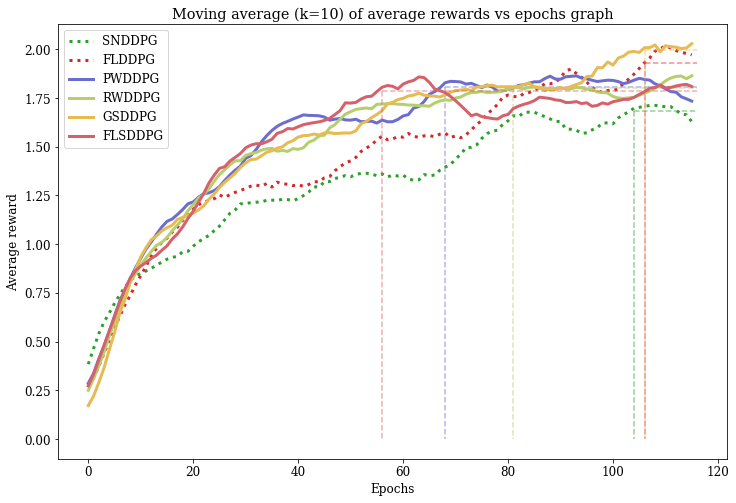

In [4]:
CONVOLUTION_SIZE = 10
conv_means = [np.convolve(means[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].rewards, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_means = [np.mean(conv_means[i]) for i in range(M)]
late_absolute_means = [np.mean(conv_means[i][100:]) for i in range(M)]
absolute_means_episode = [find_absolute_episode(conv_means[i], late_absolute_means[i]) for i in range(M)]

xs = np.arange(conv_means[0].shape[0])
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')

plt.figure(figsize=(12, 8))
for i in range(M):
    if i < 2:
        C = 2
        a = ':'
        c = base_colors(i+C)
    else:
        a = '-'
        C = 4
        c = colors((i-2)*C+2)
    plt.plot(xs, conv_means[i], label=methods[i], c=c, linewidth=3, linestyle=a)
    #plt.fill_between(xs, conv_means[i] - conv_stds[i], conv_means[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    plt.plot((absolute_means_episode[i], len(xs)), (late_absolute_means[i], late_absolute_means[i]), c=c, linestyle='--', alpha=0.5)
    plt.plot((absolute_means_episode[i], absolute_means_episode[i]), (late_absolute_means[i], -0), c=c, linestyle='--', alpha=0.5)
plt.title('Moving average (k={}) of average rewards vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Average reward')
#plt.ylim(0)
plt.legend()
#plt.savefig('imp_reward.png', dpi=200)
plt.show()

0.5682812500000001
0.7889062500000001
0.75265625
0.7626562500000001
0.71984375
0.64984375


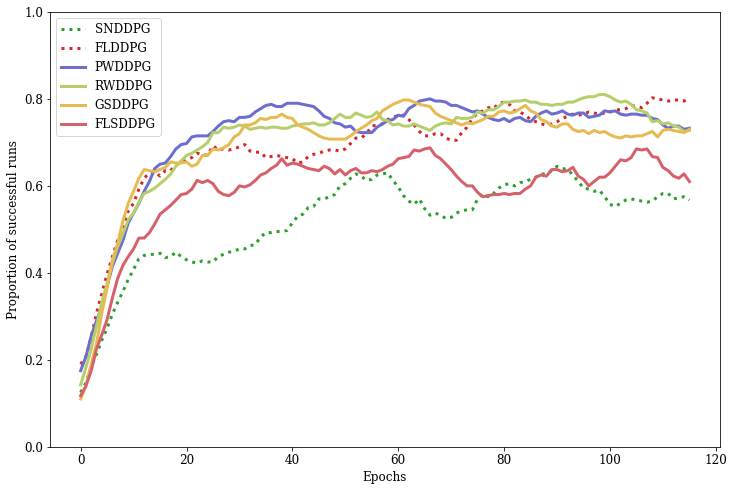

In [6]:
CONVOLUTION_SIZE = 10
conv_succ = [np.convolve(means[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_stds = [np.convolve(stds[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_mins = [np.convolve(mins[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
conv_maxs = [np.convolve(maxs[i].succeded, np.ones(CONVOLUTION_SIZE)/CONVOLUTION_SIZE, mode='valid') for i in range(M)]
absolute_succ = [np.mean(conv_succ[i]) for i in range(M)]
late_absolute_succ = [np.mean(conv_succ[i][100:]) for i in range(M)]
absolute_succ_episode = [find_absolute_episode(conv_succ[i], late_absolute_succ[i]) for i in range(M)]

xs = np.arange(len(conv_succ[0]))
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')

xs = np.arange(len(conv_succ[0]))
plt.figure(figsize=(12, 8))
for i in range(M):
    if i < 2:
        C = 2
        a = ':'
        c = base_colors(i+C)
    else:
        a = '-'
        C = 4
        c = colors((i-2)*C+2)
    plt.plot(xs, conv_succ[i], label=methods[i], c=c, linewidth=3, linestyle=a)
    #plt.fill_between(xs, conv_succ[i] - conv_stds[i], conv_succ[i] + conv_stds[i], alpha=0.15)
    #plt.fill_between(xs, conv_mins[i], conv_maxs[i], alpha=0.15)
    #plt.plot((absolute_succ_episode[i], len(xs)), (late_absolute_succ[i], late_absolute_succ[i]), c=c, linestyle='--', alpha=0.5)
    #plt.plot((absolute_succ_episode[i], absolute_succ_episode[i]), (late_absolute_succ[i], 0), c=c, linestyle='--', alpha=0.5)
    print(late_absolute_succ[i])
#plt.title('Moving average (k={}) of proportion of successful runs vs epochs graph'.format(CONVOLUTION_SIZE))
plt.xlabel('Epochs')
plt.ylabel('Proportion of successful runs')
plt.ylim(0, 1)
plt.legend()
plt.savefig('imp_succeded.png', dpi=200)
plt.show()

(-0.6, 3.6)

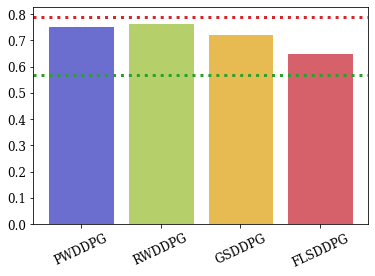

In [14]:
base_colors = plt.get_cmap('tab10')
colors = plt.get_cmap('tab20b')

S = 2
plt.xticks(rotation=25)
plt.plot([-0.6, len(methods) - S + 0.6], [late_absolute_succ[0], late_absolute_succ[0]], linestyle=':', linewidth=3, c=base_colors(2))
plt.plot([-0.6, len(methods) - S + 0.6], [late_absolute_succ[1], late_absolute_succ[1]], linestyle=':', linewidth=3, c=base_colors(3))
bar_list = plt.bar(methods[S:], late_absolute_succ[S:])
for index, bar in enumerate(bar_list):
    bar.set_color(colors(index*C+2))
plt.xlim(-0.6, len(methods[S:]) - 1 + 0.6)

## Learning rate

(0, 1)

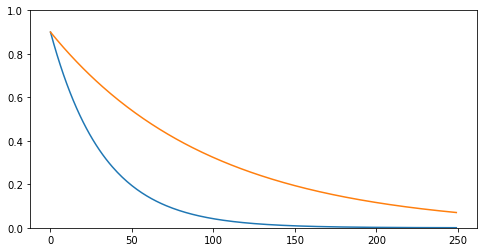

In [44]:
xs = np.arange(250)
lrs_low = 0.9 * 0.99997 ** (1024 * xs)
lrs_high = 0.9 * 0.99999 ** (1024 * xs)

plt.figure(figsize=(8, 4))
plt.plot(xs, lrs_low)
plt.plot(xs, lrs_high)
plt.ylim(0, 1)

## Weights

(-1, 5)

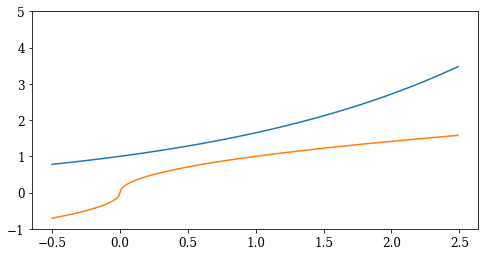

In [25]:
xs = np.arange(-0.5, 2.5, 0.01)

ys_exp_0_5 = np.e ** (0.5 * xs)
ys_sign = np.sign(xs)
ys_abs_0_5 = ys_sign * (np.abs(xs) ** 0.5)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys_exp_0_5)
plt.plot(xs, ys_abs_0_5)

plt.ylim(-1, 5)

/tmp/ipykernel_547/1133258452.py:4: RuntimeWarning: invalid value encountered in sqrt
  ys_exp_0_5 = xs ** (0.5)
/tmp/ipykernel_547/1133258452.py:6: RuntimeWarning: invalid value encountered in power
  ys_exp_1_5 = xs ** (1.5)


(0, 5)

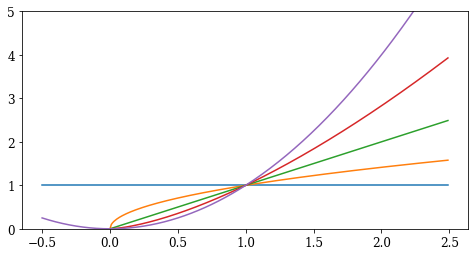

In [5]:
xs = np.arange(-0.5, 2.5, 0.01)

ys_exp_0_0 = xs ** (0.0)
ys_exp_0_5 = xs ** (0.5)
ys_exp_1_0 = xs ** (1.0)
ys_exp_1_5 = xs ** (1.5)
ys_exp_2_0 = xs ** (2.0)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys_exp_0_0)
plt.plot(xs, ys_exp_0_5)
plt.plot(xs, ys_exp_1_0)
plt.plot(xs, ys_exp_1_5)
plt.plot(xs, ys_exp_2_0)

plt.ylim(0, 5)